In [213]:
import numpy as np

def getABS(seg):
    """Finds intervals in a sequence where values are positive and greater than a threshold.

    Args:
        seg (numpy.ndarray): A 1D numpy array containing the sequence to search.
        threshold (float): The threshold value to use for identifying positive intervals.

    Returns:
        A list of tuples, where each tuple represents an interval in the sequence where values
        are positive and greater than the threshold. Each tuple has the form (start_index, end_index).
    """
    threshold = 0.15
    bool_array = seg >= threshold
    start_indices = np.where(np.logical_and(bool_array[:-1] == False, bool_array[1:] == True))[0]
    end_indices = np.where(np.logical_and(bool_array[:-1] == True, bool_array[1:] == False))[0]
    if bool_array[0]:
        start_indices = np.concatenate(([0], start_indices))
    if bool_array[-1]:
        end_indices = np.concatenate((end_indices, [len(seg)-1]))
    intervals = [(start_indices[i], end_indices[i]) for i in range(len(start_indices))]
    
    return intervals

In [214]:
import pickle
data=None
with open('speed-processed.pkl', 'rb') as f:
    data = pickle.load(f)

In [215]:
IDS = sorted(data.keys())

newdata={}

for i in range(len(IDS)):
    if data[IDS[i]]['startM']>0:
        newdata[IDS[i]] = data[IDS[i]] #print(i, data[IDS[i]]['startM'], data[IDS[i]]['endM'])

In [216]:
IDS = sorted(list(newdata.keys()))

In [217]:
newdata['A-10030']

{'ID': 'A-10030',
 'day': array([66.7, 67.5, 68.2, 67.2, 65.4, 64.9, 65.5, 66.9, 65.4, 63.2, 63.8,
        64.6, 64.7, 65.3, 63.9, 62.6, 64.9, 64.4, 60.7, 62.1, 62.2, 61.3,
        63.4, 64.9, 66.4, 66.5, 65.9, 65.9, 66. , 65.6, 65.4, 65.2, 65.1,
        65.6, 63.8, 64.6, 63.9, 65.4, 65.6, 65.7, 64.3, 62.7, 63.9, 65.2,
        64.8, 63.1, 63.7, 65.6, 62.8, 64.3, 62. , 63.3, 63.6, 64. , 63.7,
        63.9, 67.8, 66. , 67.8, 66. , 66.4, 63.7, 68.3, 67.5, 66.2, 68.5,
        67.8, 65.3, 64.3, 64. , 64.1, 64.6, 60.1, 62.7, 62.9, 62.2, 62.2,
        60.2, 59.5, 57. , 53.6, 52.2, 50.2, 49.7, 48. , 46.8, 45.8, 45.2,
        46.8, 46.8, 47.8, 48.2, 47.5, 48.9, 48. , 49. , 48.8, 46.5, 44.7,
        45.6, 45. , 47.6, 46.1, 46.4, 46.1, 46.8, 48. , 46.5, 44.5, 44.1,
        44.5, 45.6, 46.7, 44.2, 43.1, 43.6, 44.5, 43.1, 43.7, 44.5, 43.3,
        44. , 43.6, 44.6, 44.6, 44.5, 45.5, 45.1, 44.6, 45. , 46.3, 45.7,
        45.2, 44.6, 44.1, 44.8, 46.8, 46.2, 47. , 48.6, 48.7, 50.1, 47.3,
        48.4,

In [218]:


def find_closest_interval(intervals, target):
    closest_interval = None
    closest_distance = float('inf')
    for INT in intervals:
        mean = (INT[1] + INT[0]) // 2
        distance = abs(target - mean)
        if distance < closest_distance:
            closest_interval = INT
            closest_distance = distance
    return closest_interval
from sklearn.preprocessing import MinMaxScaler
def standard_scale(input_vector):
    """
    This function performs standard scaling between 0 and 1 of an input vector.
    
    Args:
    input_vector (list or numpy array): The input vector to be scaled.
    
    Returns:
    numpy array: The scaled input vector.
    """
    
    # Create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Reshape the input vector to a 2D array with one column
    input_vector_reshaped = [[x] for x in input_vector]

    # Use the scaler to perform the standard scaling
    scaled_input_vector = scaler.fit_transform(input_vector_reshaped)

    # Return the scaled input vector
    return scaled_input_vector.flatten()

gooddata={}

IDX=0
for i in range(len(IDS)):
    ID = IDS[i]
    newdata[ID]['good']=False
    
    ints = getABS(standard_scale(newdata[ID]['chebSQ']))
    if ints!= [(0, 289)]:
#         print(ints)
        newdata[ID]['intervals'] = ints
        newdata[ID]['durationM'] = newdata[ID]['endM'] - newdata[ID]['startM']
        newdata[ID]['mean5'] = (abs(newdata[ID]['end5'] - newdata[ID]['start5']))//2
        
        newdata[ID]['duration5'] = abs(min(360//5,newdata[ID]['duration5'])) #newdata[ID]['end5'] + (288-newdata[ID]['start5'])
        newdata[ID]['duration1'] = abs(min(360,abs(newdata[ID]['duration1'])))
        
        closest5 = find_closest_interval(newdata[ID]['intervals'], newdata[ID]['mean5'])
        if len(closest5)>0:
#             print(closest5)
            newdata[ID]['closest5'] = closest5
            newdata[ID]['durationW5'] = closest5[1] - closest5[0]
            if newdata[ID]['durationW5']>10:
            
                print(newdata[ID]['durationW5'])
#             print(newdata[ID]['duration1'])
            
                newdata[ID]['good']=True
                gooddata[ID] = newdata[ID]
        IDX+=1
        
print(IDX)

90
15
101
19
40
75
60
67
14
14
71
30
30
19
27
31
16
43
21
16
49
19
20
26
19
43
19
19
11
32
16
47
19
13
36
91
13
17
92
58
16
34
13
19
19
16
64
46
66
19
62
34
33
33
43
22
17
19
26
29
19
24
50
38
30
93
23
47
19
19
22
18
50
25
19
33
28
19
27
62
47
19
13
19
34
27
34
28
18
28
46
63
19
46
14
17
43
19
90
26
38
53
69
19
14
53
20
19
38
45
35
26
19
69
75
19
19
19
19
32
63
19
88
60
22
37
31
19
22
23
54
71
75
11
50
51
37
13
60
22
51
67
19
62
60
19
25
19
42
15
51
19
51
60
54
35
25
32
53
21
41
39
70
14
36
25
25
47
19
21
64
34
54
21
55
52
66
27
47
35
16
51
55
53
47
41
22
19
66
28
90
17
29
25
19
46
46
25
12
19
25
79
48
73
17
19
26
19
68
21
21
12
12
19
48
92
91
91
30
19
36
48
105
20
19
51
45
18
16
54
22
18
23
11
32
59
59
34
41
74
39
47
19
62
34
11
57
19
15
17
57
78
12
64
20
58
38
19
91
61
19
53
15
61
11
93
59
15
52
20
61
21
34
52
18
83
19
38
45
27
32
12
47
62
30
19
55
56
22
40
48
91
19
21
19
31
47
75
30
19
20
29
26
21
73
26
19
19
30
19
21
68
38
27
42
60
32
12
57
24
21
22
29
19
90
85
30
25
54
14
19
19
76

In [219]:
import pickle

# your code that populates the results dictionary

# dump the results dictionary into a file using pickle
with open('data_intervals.pkl', 'wb') as f:
    pickle.dump(gooddata, f)

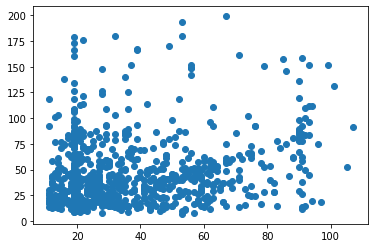

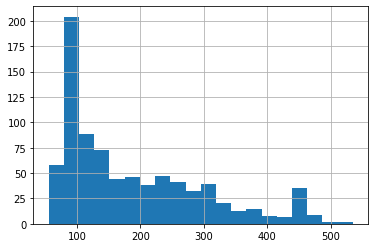

In [220]:
import pandas as pd
res = pd.DataFrame(gooddata)
res = res.T
res = res[res.duration1>0]

import matplotlib.pyplot as plt
plt.scatter(res.durationW5, res.durationM)
# corr = np.corrcoef(res.durationW5.values.reshape(-1,1), res.durationM.values.reshape(-1,1))
# print(corr)
plt.show()
print()
plt.hist(res.durationW5*5,bins=20)
plt.grid()
plt.show()
print()

In [106]:
for i in range(len(IDS)):
    ID = IDS[i]
#     print(newdata[ID].keys())
    ints = getABS(newdata[ID]['chebSQ'])
    if len(ints)==0:
        continue
    newdata[ID]['intervals'] = ints
    
    print(newdata[ID]['intervals'])
    newdata[ID]['durationM'] = newdata[ID]['endM'] - newdata[ID]['startM']
    
    newdata[ID]['start5'] = (max(newdata[ID]['start5'],0))
    newdata[ID]['end5'] = (min(newdata[ID]['end5'],288))
    
    newdata[ID]['mean5'] = newdata[ID]['end5'] - newdata[ID]['start5']
    
    if newdata[ID]['mean5']<0:
        newdata[ID]['start5'] = 0
        newdata[ID]['start1'] = 0
        newdata[ID]['mean5'] = newdata[ID]['end5'] - newdata[ID]['start5']
        
        newdata[ID]['duration5'] = 360//5 #newdata[ID]['end5'] + (288-newdata[ID]['start5'])
        newdata[ID]['duration1'] = 360 #newdata[ID]['end1'] + (288*5-newdata[ID]['start1'])
        
#         print(newdata[ID]['start5'], newdata[ID]['end5'])
        
#     newdata[ID]['durationW'] = newdata[ID]['endW'] - newdata[ID]['startW']
    newdata[ID]['closest5'] = find_closest_interval(newdata[ID]['intervals'], newdata[ID]['mean5'])
#     print(newdata[ID]['intervals'],newdata[ID]['closest5'])
    newdata[ID]['durationW5'] = (newdata[ID]['closest5'])[1] - (newdata[ID]['closest5'])[0]
    
    print(ints)
    
    if newdata[ID]['duration1']<0:
        newdata[ID]['duration1'] = 360

[(163, 253)]
[(163, 253)]
[(68, 83), (171, 256)]
[(68, 83), (171, 256)]
[(143, 244)]
[(143, 244)]
[(1, 288)]
[(1, 288)]
[(83, 102), (115, 122), (159, 232)]
[(83, 102), (115, 122), (159, 232)]
[(0, 7), (101, 162), (164, 186), (268, 290)]
[(0, 7), (101, 162), (164, 186), (268, 290)]
[(2, 42), (53, 73), (115, 133), (155, 172), (177, 196)]
[(2, 42), (53, 73), (115, 133), (155, 172), (177, 196)]
[(0, 75), (208, 227)]
[(0, 75), (208, 227)]
[(58, 118), (149, 178), (182, 201)]
[(58, 118), (149, 178), (182, 201)]
[(34, 101), (153, 173), (208, 227)]
[(34, 101), (153, 173), (208, 227)]
[(0, 14), (130, 177), (207, 246)]
[(0, 14), (130, 177), (207, 246)]
[(1, 288)]
[(1, 288)]
[(1, 288)]
[(1, 288)]
[(81, 95), (117, 173), (208, 219), (265, 290)]
[(81, 95), (117, 173), (208, 219), (265, 290)]
[(68, 139), (140, 147), (160, 178)]
[(68, 139), (140, 147), (160, 178)]
[(131, 161), (176, 197), (200, 206), (234, 257), (268, 290)]
[(131, 161), (176, 197), (200, 206), (234, 257), (268, 290)]
[(131, 161), (176,

In [107]:
import pickle

# your code that populates the results dictionary

# dump the results dictionary into a file using pickle
with open('data_intervals.pkl', 'wb') as f:
    pickle.dump(newdata, f)

In [180]:
# for INT in newdata[ID]['intervals']:
#     mean = (INT[1]+INT[0])//2

In [181]:
# res[res.duration1<0]['duration1']=360

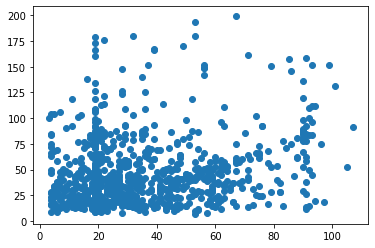

<AxesSubplot:>

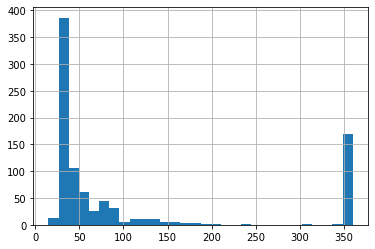

In [68]:
res.duration1.hist(bins=30)

<AxesSubplot:>

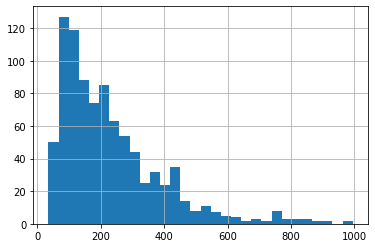

In [69]:
(res.durationM*5).hist(bins=30)

In [91]:
(res.durationW*5).hist(bins=30)

AttributeError: 'DataFrame' object has no attribute 'durationW'

In [92]:
res.mean5

A-10030       5
A-1011500    18
A-1021529     0
A-1021532     9
A-1024015    15
             ..
A-940935     35
A-940959      6
A-949186     24
A-951704     18
A-951711     15
Name: mean5, Length: 998, dtype: object